<h1><center>PORTADA</h1>

<p align="center">Curso:Programación para el Analisis de Datos</p>

<p align="center"> Código Curso: 203008069_14</p>

<p align="center"> Grupo: 203008067_14 </p>

 <p align="center"> Tarea 3 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Wagner Alonso Fernández Villalobos</p>

 <p align="center">  Tutor(a): Jose Laureano Cruz Cardozo </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Fecha: 14/07/2024 </p>

<h1><center>INTRODUCCIÓN</h1>

<p style="text-align: justify;">La estadística descriptiva, el escalamiento, la estandarización y codificación, junto con los gráficos y la visualización científica, son componentes esenciales en el análisis de datos; cada uno de estos conceptos juega un papel crucial en la comprensión, interpretación y comunicación de la información extraída de los datos.</p>

<h1><center>DESARROLLO</h1>

#### Acerca  de los datos

<p style="text-align: justify;">Los datos utilizados en este ejercicio, son extraidos del Sistema de Gestión Documental Electrónica de Archivo - (SGDEA) de la Policía Nacional de Colombia, llamado Gestor de Documentos Policiales - GEPOL, el aplicato tipo web, ees utilizado para elaborar y gestionar documentos elecrtrónicos con firma digital; así mismo, documentos en fisico con firma manuscrita que son digitalizados. </p>

<p style="text-align: justify;">Es un archivo en formato .json (JavaScript Object Notation), que contiene naturalmente 05 columnas, llamadas: 'Mes', 'Dia','Cantidad', 'NoMes' y 'PesoGB'. De las cuales cuatro columnas tienen variables numericas y una columna tiene variable categórica; en el conjunto de datos, se refleja el día, mes, cantidad y ocupación en disco (Gigabytes) que tienen los documentos producidos con sus respectivos anexos en el gestor desde el primero de enero hasta el 30 de septiembre del 2023 en el Departamento de Policía Caquetá.</p>

#### Lectura de los datos

Importar las librerías necesarias para el ejercicio, las cuales servirán para hacer Análisis Exploratorio de Datos (EDA) por sus siglas en inglés y las respectivas gráficas.

In [1]:
import os#interactuar con el sistema operativo en el que se ejecuta el software
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lectura del conjunto de datos o DataFrame

In [2]:
data = pd.read_json('data/produccion_gepol.json')
order_by_month = data.sort_values('NoMes')# metodo sort para ordenar el dataframe de enero a septiembre
order_by_month.head(10)

,Mes,Dia,Cantidad,NoMes,PesoGB
0,ENERO,31,384,1,10.92
34,ENERO,2,329,1,23.88
35,ENERO,5,270,1,10.45
36,ENERO,12,291,1,10.63
62,ENERO,23,366,1,10.73
63,ENERO,30,336,1,22.95
64,ENERO,22,250,1,11.29
65,ENERO,3,323,1,12.32
66,ENERO,13,275,1,24.02
96,ENERO,21,283,1,24.76


Información del DataFrame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mes       273 non-null    object 
 1   Dia       273 non-null    int64  
 2   Cantidad  273 non-null    int64  
 3   NoMes     273 non-null    int64  
 4   PesoGB    273 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 12.8+ KB


#### Concepto 1: Parámetros y métricas descriptivas

Muestre las métricas descriptivas para todas las columnas de su base de datos  según el tipo de variable como sigue: 

* Variables numéricas: Cantidad de datos, media, desviación estándar, mínimo, máximo y percentiles 25, 50 y 75. 

Tendiendo en cuenta el libro de Madhavan. (2015), se utliza el metodo select_dtypes de la librería pandas para seleccionar unicamente las columnas con valores del conjunto de datos que sean numericas,que en este caso son de tipo int64 o float64.

In [4]:
#se define la variable para que se contabilize los datos de tipo numerico llamada "numeric_columns"
numeric_columns = data.select_dtypes(include=['int64',
                                              'float64']).columns

print('Analisis de las columnas númericas')

print(data[numeric_columns].describe())

Analisis de las columnas númericas
              Dia    Cantidad       NoMes      PesoGB
count  273.000000  273.000000  273.000000  273.000000
mean    15.681319  355.439560    5.018315   20.505165
std      8.792392  116.404234    2.583110    6.057719
min      1.000000  101.000000    1.000000   10.040000
25%      8.000000  246.000000    3.000000   15.410000
50%     16.000000  377.000000    5.000000   20.280000
75%     23.000000  446.000000    7.000000   25.160000
max     31.000000  600.000000    9.000000   30.480000




* Variables categóricas: Cantidad, cantidad de valores únicos, moda y frecuencia de la moda. 


Tendiendo en cuenta el libro de Madhavan. (2015), se utliza el metodo select_dtypes de la librería pandas para seleccionar unicamente las columnas con valores del conjunto de datos que sean numericas,que en este caso son de tipo object.

In [5]:
#se define variable para verificar columnas de tipo categorico en el dataframe
categoric_columns = data.select_dtypes(include='object').columns

#ciclo for para hacer el analisis de las columnas con variable catecórica
for columns in categoric_columns:
    print('#######################')
    print(f"\nAnalisis de la columna categórica {columns}")
    print('#######################')
    print(data[columns].describe())
    print('#######################')
    print(data[columns].value_counts())
    print('#######################')
    print(f"Moda: {data[columns].mode()}")

#######################

Analisis de la columna categórica Mes
#######################
count       273
unique        9
top       ENERO
freq         31
Name: Mes, dtype: object
#######################
Mes
ENERO         31
MARZO         31
MAYO          31
JULIO         31
AGOSTO        31
ABRIL         30
JUNIO         30
SEPTIEMBRE    30
FEBRERO       28
Name: count, dtype: int64
#######################
Moda: 0    AGOSTO
1     ENERO
2     JULIO
3     MARZO
4      MAYO
Name: Mes, dtype: object


* Muestre la matriz de correlación de las variables numéricas e identifique las variables que más se correlacionan (visualizarla, ver concepto 3). 


<p style="text-align: justify;">Teniendo en cuenta el libro de Madhavan (2015), se desarrolla la matriz de correlación definiendo la variable, seleccionando las variables de tipo numérica, con el metodo select_dtypes y luego se desarrolla otro codigo donde se utiliza el método df[].corr para que se haga matriz de forma numérica.</p>

In [6]:
#se define variable para la detección de variables numericas
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).columns

#se procede con calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr(numeric_only=True)
correlation_matrix

,Dia,Cantidad,NoMes,PesoGB
Dia,1.000000,0.144115,0.010942,-0.027105
Cantidad,0.144115,1.000000,0.059445,0.035396
NoMes,0.010942,0.059445,1.000000,-0.013300
PesoGB,-0.027105,0.035396,-0.013300,1.000000


* Realice un análisis de los resultados obtenidos. 

Analizando los resultados, se sabe que las variables son: 

* 'Mes' : Categórica letras
* 'Dia': Numérica
* 'Cantidad': Numérica
* 'NoMes': Numérica
* 'PesoGB': Numérica

De esta forma, también se analiza la matriz de correlación que en este conjunto de datos, ayuda a revisar la relación entre dos o más variables, ya sean positivas o negativas.

#### Concepto 2: Escalamiento, estandarización y codificación

* Categorice al menos una variable continúa. Defina consistentemente las categorías propuestas y explique por qué las propone. 
 

<p style="text-align: justify;">Para este caso, se categorizó una variable continua que según Madhavan (2015) es poder tomar valores infinitos, dentro de un intervalo determinado, que pueden adoptar un valor minimo y valor máximo. Para este caso, se tomó la columna 'PesoGB' que representa la cantidad de Gigabytes que ocupan los documentos en los servidores de computo por día; categorizar las variables numericas a texto.</p>

In [7]:
#seleccionar la variable continua a categorizar
continuous_variable = "PesoGB"

#se procede con ategorizar la variable usando discretización con 5 intervalos equidistantes
n_intervals = 3
intervals = np.linspace(data[continuous_variable].min(),#el minimo
                        data[continuous_variable].max(), #el maximo
                        n_intervals + 1)

labels = pd.cut(data[continuous_variable], 
                intervals, 
                labels=["Baja", "Media", "Alta"])

#agregar la nueva variable categórica al DataFrame
data["Ocupacion_en_disco"] = labels

#impresión del dataframe con la nueva columna que contiene la categoría
data

#extra: exportar dataframe
#data.to_csv("data/data_categorized.csv")

,Mes,Dia,Cantidad,NoMes,PesoGB,Ocupacion_en_disco
0,ENERO,31,384,1,10.92,Baja
1,ENERO,19,351,1,12.86,Baja
2,ENERO,4,410,1,16.20,Baja
3,ENERO,26,415,1,11.89,Baja
4,ENERO,10,273,1,24.05,Alta
...,...,...,...,...,...,...
268,SEPTIEMBRE,26,565,9,14.71,Baja
269,SEPTIEMBRE,27,386,9,17.53,Media
270,SEPTIEMBRE,28,333,9,19.85,Media
271,SEPTIEMBRE,29,347,9,25.23,Alta


* Estandarice o escale al menos dos variables numéricas que sean diferentes en magnitud o unidades de medición, de modo que pueda comparar y encontrar similitudes o diferencias en sus distribuciones (visualmente, ver concepto 3).

Escalar datos

In [8]:
data_selected = data[['Cantidad', 'PesoGB']]#se toma como diferencia una como medida de almacenamiento y otra como cantidad

# aplicación del escalado minimo y maximo
data_scaled = (data_selected - data_selected.min()) / (data_selected.max() - data_selected.min())
data_scaled

,Cantidad,PesoGB
0,0.567134,0.043053
1,0.501002,0.137965
2,0.619238,0.301370
3,0.629259,0.090509
4,0.344689,0.685421
...,...,...
268,0.929860,0.228474
269,0.571142,0.366438
270,0.464930,0.479941
271,0.492986,0.743151


Estandarizar datos

In [9]:
data_selected = data[['Cantidad', 'PesoGB']]

#aplicar la estandarización
data_standardized = (data_selected - data_selected.mean()) / data_selected.std()
data_standardized

,Cantidad,PesoGB
0,0.245356,-1.582306
1,-0.038139,-1.262053
2,0.468715,-0.710691
3,0.511669,-1.422180
4,-0.708218,0.585177
...,...,...
268,1.800282,-0.956658
269,0.262537,-0.491136
270,-0.192773,-0.108154
271,-0.072502,0.779969


<p style="text-align: justify;">Para este caso, se utilizaron dos variables numéricas, una representa la cantidad en Gigabytes ocupada en disco por día en documentos producidos y firmados, la otra variable representa la cantidad de documentos producidos por cada una de los Distritos, Estaciones y Subestaciones de Policía, así las oficinas administrativas que iontegran el Departamento de Polícía Caquetá.</p>

#### Concepto 3: Gráficos y visualización científica

* Realice al menos un diagrama de barras. 

<p style="text-align: justify;">Se desarrolla el codigo tipo barra con la librería Seaborn, donde se toman como referencias las variables de mes y cantidad de documentos producidos agrupados, se le añaden leyendas y unos colores que son favoritos para diferenciar las barras. Lps colores que se tomaron son personalizados, de los cuales se puede extraer el código desde el siguiente enlace web: https://htmlcolorcodes.com/es/</p>

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_10464\2423531755.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = 'Mes',
C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_10464\2423531755.py:12: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  g = sns.barplot(x = 'Mes',
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-

Text(0.5, 1.0, 'Gráfico No. 1 - Cantidad de documentos producidos en el aplicativo GEPOL año 2023 (Mes a Mes)')

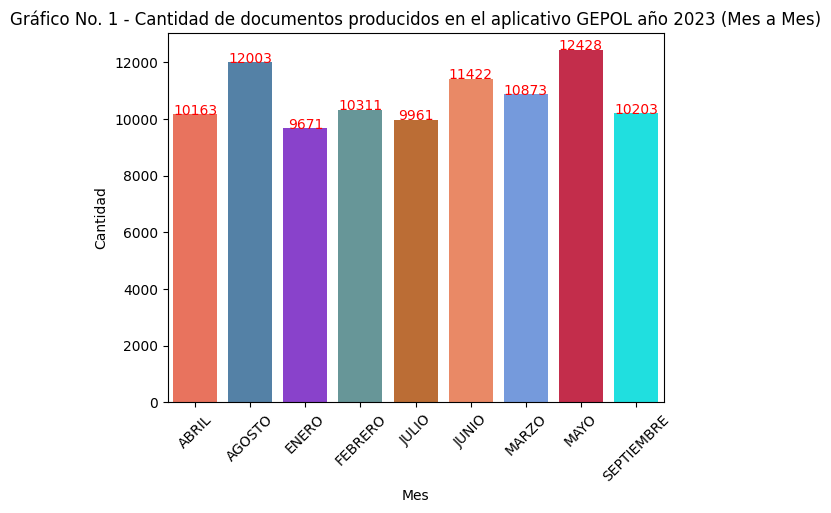

In [10]:
data = pd.read_json('data/produccion_gepol.json')
groupedvalues = data.groupby('Mes').sum().reset_index() #metodo groupby para agrupar los datos por meses.

favorites_colors = ['#FF6347', '#4682B4', 
                   '#8A2BE2', '#5F9EA0', 
                   '#D2691E', '#FF7F50', 
                   '#6495ED', '#DC143C', 
                   '#00FFFF', '#00008B', 
                   '#008B8B', '#B8860B']#codigo de los colores favoritos

"personalizar el gráfico"
g = sns.barplot(x = 'Mes', 
                y = 'Cantidad', 
                data = groupedvalues,
                palette=favorites_colors)

#para asignar las cantidades al gráfico de barras
for index, row in groupedvalues.iterrows():
    
    g.text(row.name, 
           row.Cantidad - 2, 
           round(row.Cantidad, 2), 
           color = 'red', 
           ha = "center")

plt.xticks(rotation=45)# para que se ve bien presentado el grafico en los meses
plt.title('Gráfico No. 1 - Cantidad de documentos producidos en el aplicativo GEPOL año 2023 (Mes a Mes)')

<p style="text-align: justify;">Análisis de los resultados: Se observa en el gráfico una mayor producción documental en el mes de mayo del año 2023, con 12.428 documentos, los cuales son datos que fueron agrupados por meses, teniendo en cuenta el metodo data.groupby('Mes').sum().reset_index() para que tome los 30 o 31 días de cada mes y los agrupe Roldán et al. (2019). La producción en ese mes, se presentó una mayor producción debido a que para ese més hubieron marchas relacionadas al día del trabajo, por lo cual radicaron más documentos en el gestor.</p>

* Realice al menos un diagrama de cajas. 

c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Gráfico No. 2 - Consolidado general de documentos producidos en el GEPOL 2023 (Cantidad)')

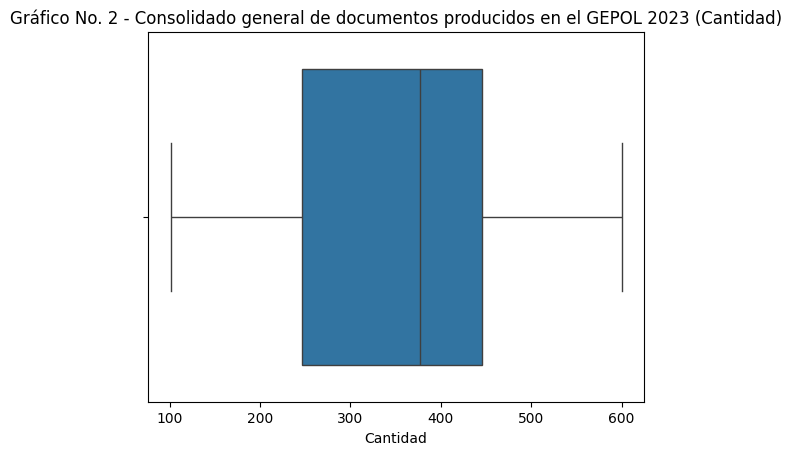

In [11]:
sns.boxplot(x = "Cantidad", data = data)
plt.title('Gráfico No. 2 - Consolidado general de documentos producidos en el GEPOL 2023 (Cantidad)')

<p style="text-align: justify;">Análisis de resultados: Para inferir un boxplot o gráfico de cajas permite panear rápidamente la centralidad, dispersión y posibles valores atípicos en un conjunto de datos, facilitando la comparación entre diferentes DataFrames o la detección de patrones y anomalías. La cantidad de documentos producidos en el GEPOL durante los nueve meses del 2023, muestra una distribución con una mediana de 377 documentos por mes aproximadamente  Galea (2018).</p>

* Realice al menos un diagrama de pie de una variable categórica (debe realizar agrupación por conteo). 

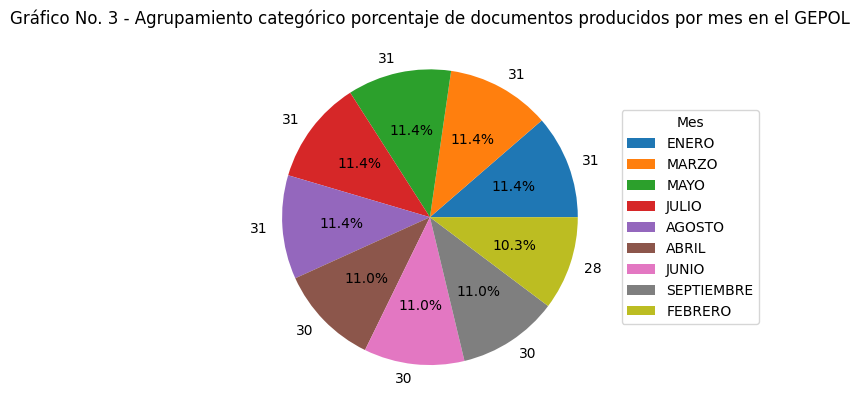

In [12]:
group_by_count = data["Mes"].value_counts()#variable categorica seleccionada, en este caso mes
fig, ax = plt.subplots()

#crear el diagrama de torta
wedges, texts, autotexts = ax.pie(group_by_count, 
                                  labels=group_by_count, 
                                  autopct="%1.1f%%")

#creación de leyendas y su alineación
legend = plt.legend(wedges, 
                    group_by_count.index, 
                    title="Mes", 
                    loc="center left",#alineación hacia la derecha
                    bbox_to_anchor=(1, 0.5))  

#Titulo de la gráfica
plt.title("Gráfico No. 3 - Agrupamiento categórico porcentaje de documentos producidos por mes en el GEPOL")
plt.show()

<p style="text-align: justify;">Análisis de resultados: Al analizar la variable categórica, la cual fue agrupada, se hizo el respectivo conteo, arrojando 5 meses con un porcentaje de 11.4%, 3 meses con un porcentaje de 11.0% y una sola variable con el 10.3%, teniendo en cuenta la cantidad de dias transcurridos por mes en la producción de documentos en diferentes soportes. (Bruce et al., 2022)</p>

* Realice un scatter plot (o pair plot) de las variables numéricas identificadas en el Concepto 1. 

Gráfico No. 4 - Agrupamiento categórico porcentaje de documentos producidos por mes en el GEPOL


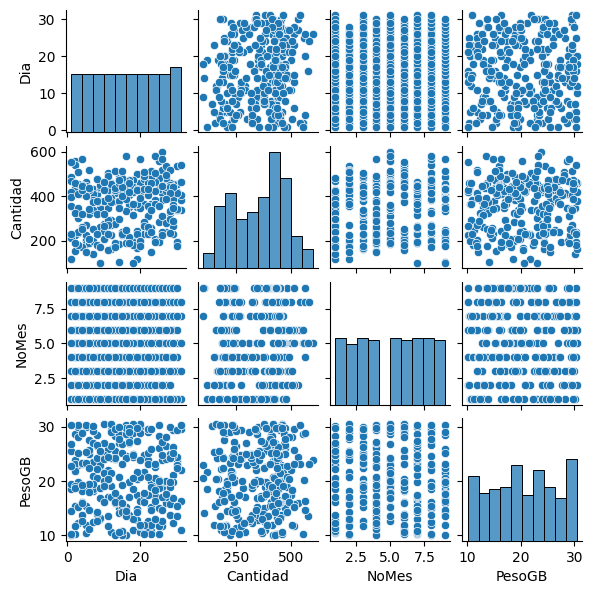

In [13]:
sns.pairplot(data,height=1.5)
print("Gráfico No. 4 - Agrupamiento categórico porcentaje de documentos producidos por mes en el GEPOL")
plt.show()

<p style="text-align: justify;">Análisis de resultados: el gráfico como tal, indica que no hay correlaciones fuertes entre las variables, cada una de estas, muestra una distribución bastante dispersa ya que los datos en las diferentes columnas son datos atipicos; la gráfica tipo parcela, es una herramienta visual muy útil en el análisis exploratorio de datos, esta permite visualizar la relación entre múltiples variables en un solo gráfico (Bruce et al., 2022).</p>

* Realice un diagrama de violín con la categorización de la variable continua que desarrollo en el Concepto 2.

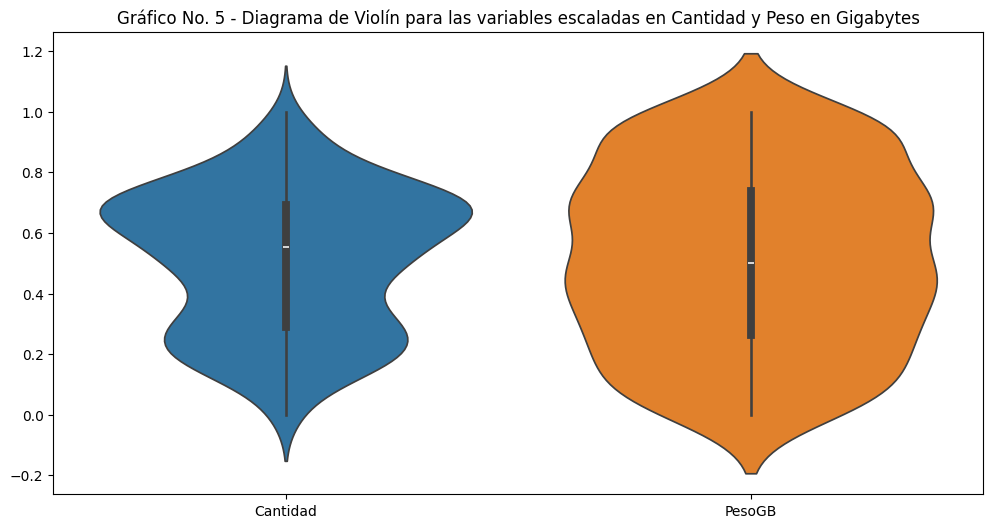

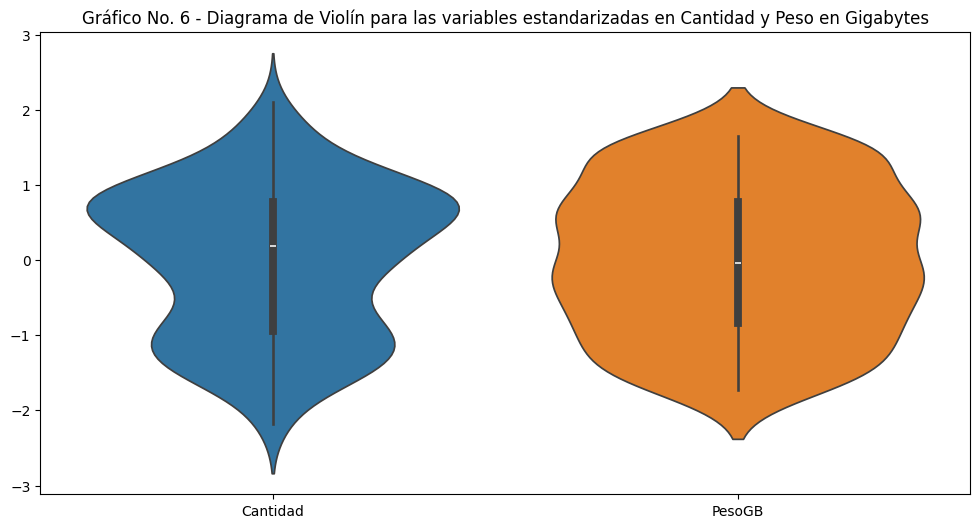

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_scaled[['Cantidad', 'PesoGB']])
plt.title('Gráfico No. 5 - Diagrama de Violín para las variables escaladas en Cantidad y Peso en Gigabytes')
plt.show()


plt.figure(figsize=(12, 6))#el tamaño
sns.violinplot(data=data_standardized[['Cantidad', 'PesoGB']])
plt.title('Gráfico No. 6 - Diagrama de Violín para las variables estandarizadas en Cantidad y Peso en Gigabytes')
plt.show()

<p style="text-align: justify;">Análisis de resultados: Según Boschetti & Massaron (2016), un diagrama de violín, es la representación en espejo del histograma, pero se lee de forma veertical  se utiliza para visualizar la distribución de los datos y su densidad de probabilidad, para mostrar la forma de distribución en los datos; la barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana, para este caso, se analizó las variables de 'Cantidad' y 'PesoGB', las variables estandarizadas tienen una media de 0 y una desviación estándar de 1.</p>

* Realice un gráfico que le permita visualizar la comparación de los histogramas (distribuciones) de las variables que estandarizó o escaló en concepto 2. 

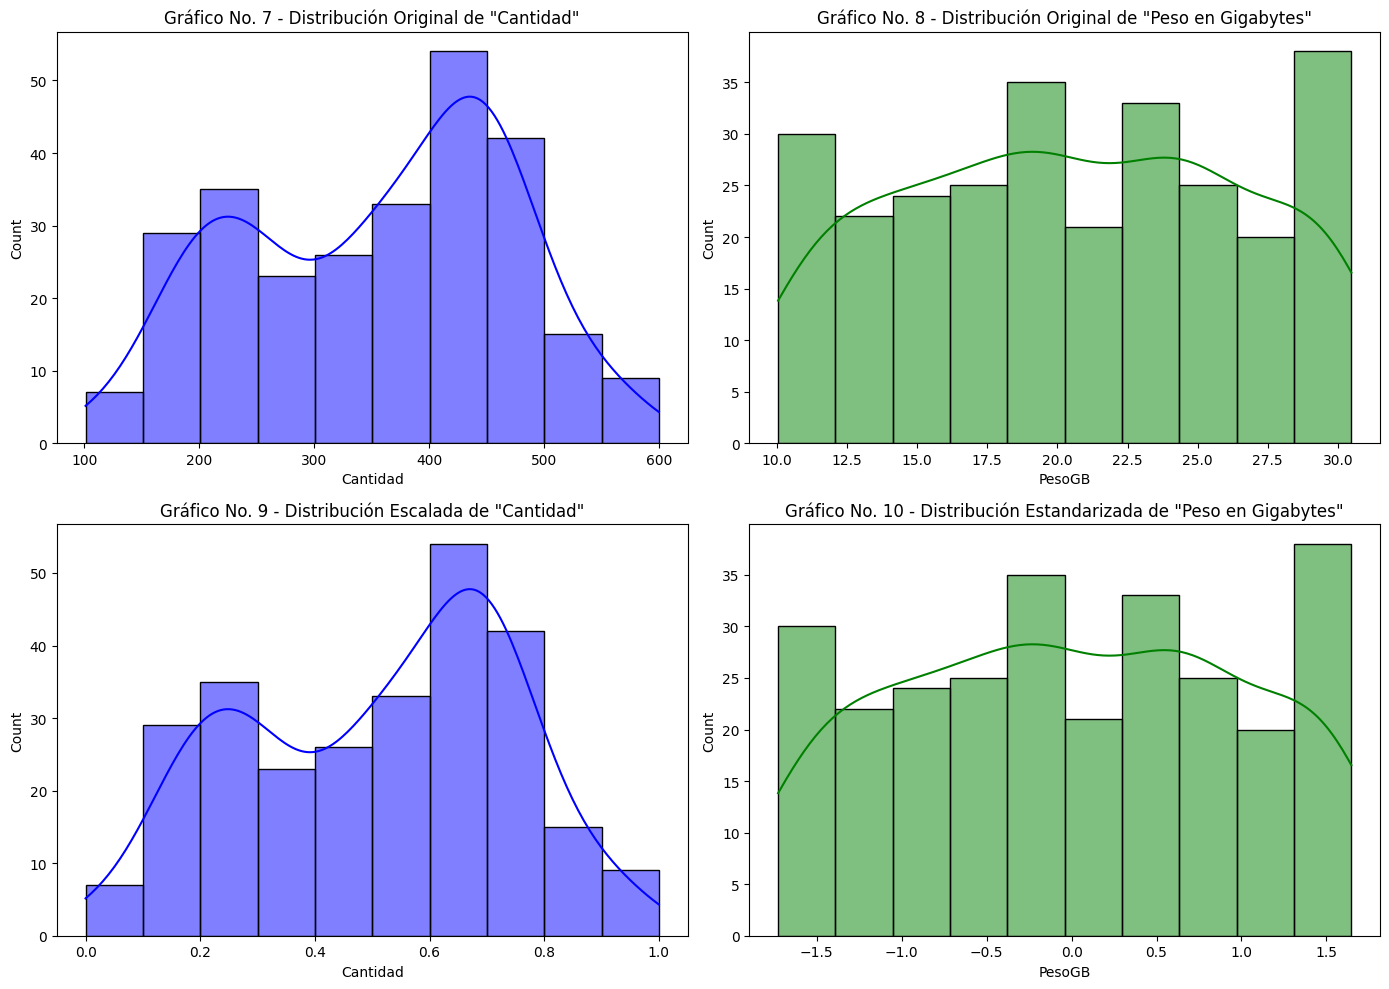

In [15]:
#crear histogramas comparativos o superpuestos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#histograma original sobre cantidad
sns.histplot(data['Cantidad'], 
             kde=True, 
             color='blue', 
             ax=axes[0, 0])

axes[0, 0].set_title('Gráfico No. 7 - Distribución Original de "Cantidad"')

#crear histograma original 'Cantidad'
sns.histplot(data['PesoGB'], 
             kde=True, 
             color='green', 
             ax=axes[0, 1])

axes[0, 1].set_title('Gráfico No. 8 - Distribución Original de "Peso en Gigabytes"')

#crear histograma escalado 'cantidad'
sns.histplot(data_scaled['Cantidad'],
              kde=True, 
              color='blue', 
              ax=axes[1, 0])

axes[1, 0].set_title('Gráfico No. 9 - Distribución Escalada de "Cantidad"')

#crear histograma estandarizado 'de peso en GB'
sns.histplot(data_standardized['PesoGB'], 
             kde=True, 
             color='green', 
             ax=axes[1, 1])

axes[1, 1].set_title('Gráfico No. 10 - Distribución Estandarizada de "Peso en Gigabytes"')

plt.tight_layout()
plt.show()

<p style="text-align: justify;">Análisis de resultados: Los gráficos muestran las distribuciones de "Cantidad" y "Peso en Gigabytes" antes y después de aplicar técnicas de preprocesamiento, la distribución de "Cantidad" tiene un pico entre los 370 a 400 documentos producidos y una cola hacia la izquierda, mientras que su versión escalada mantiene la misma forma pero ajustada en el 0 y 1; la distribución de "Peso en Gigabytes" es bastante uniforme originalmente, y su versión estandarizada también mantiene la forma original, pero centrada en 0. Boschetti & Massaron (2016)</p>

* Muestre gráficamente la matriz de correlación solicitada en el concepto 1. 

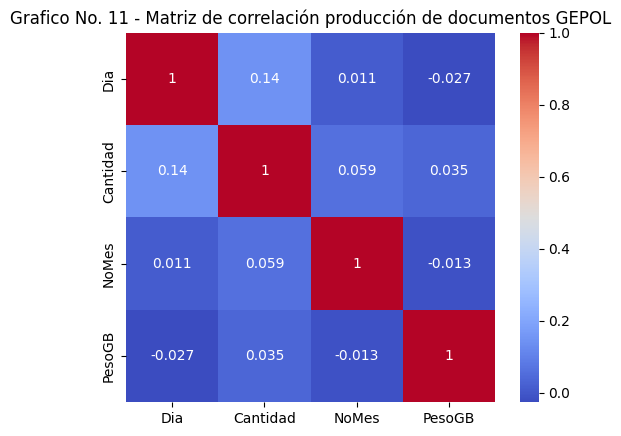

In [16]:
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            square=True)


plt.title('Grafico No. 11 - Matriz de correlación producción de documentos GEPOL')
plt.show()

<p style="text-align: justify;">Análisis de resultados: Para este caso, no hay ninguna correlación entre las variables que tiene el DataFrame, debido a que cuando las variables en el gráfico tienen valores cercanos al uno tienen un color similar, lo cual se se interpreta que hay correlación; no obstante,cuando una variable no es correlacional, en el gráfico los colores son frios o diferentes, en este caso se verifica las columnas y filas de este conjunto de datos y no hay colores similares que se acerquen al valor uno (1). Esto es suscitado por características que no tienen una influencia directa entre sí en el contexto específico del análisis, teniendo en cuenta que los valores no cambian mucho de forma diaria en el gestor. (Bruce et al., 2022)</p>

<h1><center>CONCLUSIÓN</h1>

<p style="text-align: justify;">Para inferir, la estadística descriptiva, el escalamiento, la estandarización y codificación, junto con la visualización científica, forman la base del análisis de datos, estas herramientas coadyuvan a  transformar datos brutos en información valiosa y accionable, que facilita la toma de decisiones, generando conocimiento y sabiduría; promoviendo mejoras en los problemas de negocio o casos de uso e innovar procesos desde el aspecto personal hasta lo industrial.</p>

<h1><center>REFERENCIAS BIBLIOGRÁFICAS</h1>

Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49).  

Boschetti, A., & Massaron, L. (2016). Python Data Science Essentials - Second Edition (Vol. 0002). Packt Publishing. (pp.124-134).  

Bruce, P., Bruce, A., & Gedeck, P. (2022b). Estadística práctica para ciencia de datos con R y Python. Marcombo.

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con python: Recolección, almacenamiento y proceso. Alpha Editorial.

Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 77-106).  

Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 536 - 563). 

Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures (1.). O’Reilly Media.